In [1]:
library(Seurat)
library(ggplot2)
library(CellChat)

Attaching SeuratObject

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
ilc <- readRDS('/data_alluser/YR/wenzhang/scRNA.data/Processing/rds/ILC_no_5_7.rds')

In [3]:
ilc@meta.data$clusters <- paste0('C',ilc@meta.data$seurat_clusters)

In [4]:
#导入配体受体数据库
CellChatDB <- CellChatDB.human #这里选的是小鼠

In [6]:
#构建Cell Chat对象时，输入的是log后的数据
cellchat <- createCellChat(object=ilc,group.by = 'clusters')
# use all CellChatDB for cell-cell communication analysis
CellChatDB.use <- CellChatDB # simply use the default CellChatDB

# set the used database in the object
cellchat@DB <- CellChatDB.use
# subset the expression data of signaling genes for saving computation cost
cellchat <- subsetData(cellchat) # This step is necessary even if using the whole database

[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is SCT 
The `meta.data` slot in the Seurat object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  C0 C1 C2 C3 C4 C5 


In [7]:
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- projectData(cellchat, PPI.human)

cellchat <- computeCommunProb(cellchat,raw.use = FALSE, population.size = TRUE)
cellchat <- filterCommunication(cellchat, min.cells = 5)
cellchat <- aggregateNet(cellchat)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-03-06 22:46:28]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-03-06 22:48:26]"


In [9]:
future::plan("multiprocess", workers = 4)#4个进程

Warning message:
“Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


In [10]:
#根据表达值推测细胞互作的概率（cellphonedb是用平均表达值代表互作强度）。# 占内存
options(future.globals.maxSize=4000000000)
#cellchat <- projectData(cellchat, PPI.human) #将数据投影到与蛋白质相互作用（PPI）有关的维度上。
cellchat <- computeCommunProb(cellchat, raw.use = TRUE, population.size = TRUE)   #如果不想用上一步PPI矫正的结果，raw.use = TRUE即可。
#计算细胞之间的通讯概率，包括原始使用计数和人口大小的考虑。

triMean is used for calculating the average gene expression per cell group. 


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly sp

R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly sp

R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-03-06 22:49:34]"


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly sp

R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-03-06 22:52:17]"


In [12]:
#cellchat <- computeCommunProb(cellchat, raw.use = TRUE, population.size = TRUE)
#cellchat <- filterCommunication(cellchat, min.cells = 5)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")
#cellchat <- computeNetSimilarity(cellchat, type = "functional")
#cellchat <- netEmbedding(cellchat, type = "functional")
#cellchat <- netClustering(cellchat, type = "functional")
#cellchat <- computeNetSimilarity(cellchat, type = "structural")
#cellchat <- netEmbedding(cellchat, type = "structural")
#cellchat <- netClustering(cellchat, type = "structural")


Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”
Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly sp

R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-3’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-4’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


In [13]:
df.netp <- subsetCommunication(cellchat, slot.name = "netP")
df.netp

,source,target,pathway_name,prob,pval
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,C0,C0,CLEC,5.953889e-04,0.00
2,C0,C0,MIF,8.527410e-04,0.02
3,C0,C1,CD99,9.963552e-03,0.00
4,C0,C1,CLEC,5.305556e-04,0.00
5,C0,C1,MHC-I,1.153870e-02,0.00
6,C0,C2,CLEC,1.042231e-03,0.00
7,C0,C2,ITGB2,5.331543e-04,0.00
8,C0,C3,ADGRE5,7.611404e-05,0.00
9,C0,C3,CLEC,9.791768e-04,0.00


Do heatmap based on a single object 


Do heatmap based on a single object 


Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”
Warning message:
“`legend_height` you specified is too small, use the default minimal
height.”


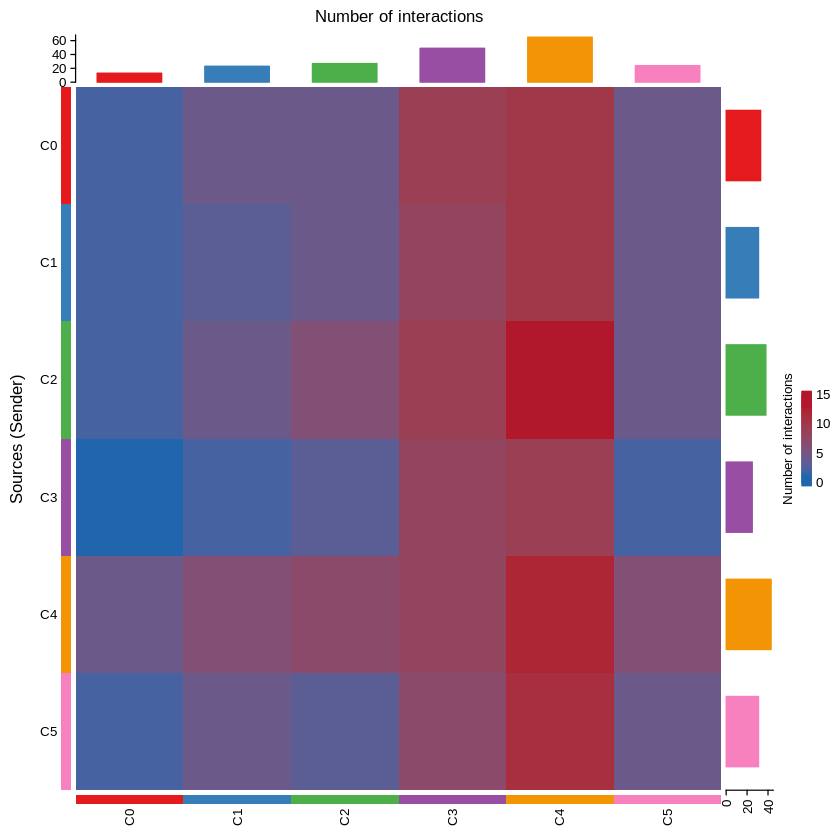

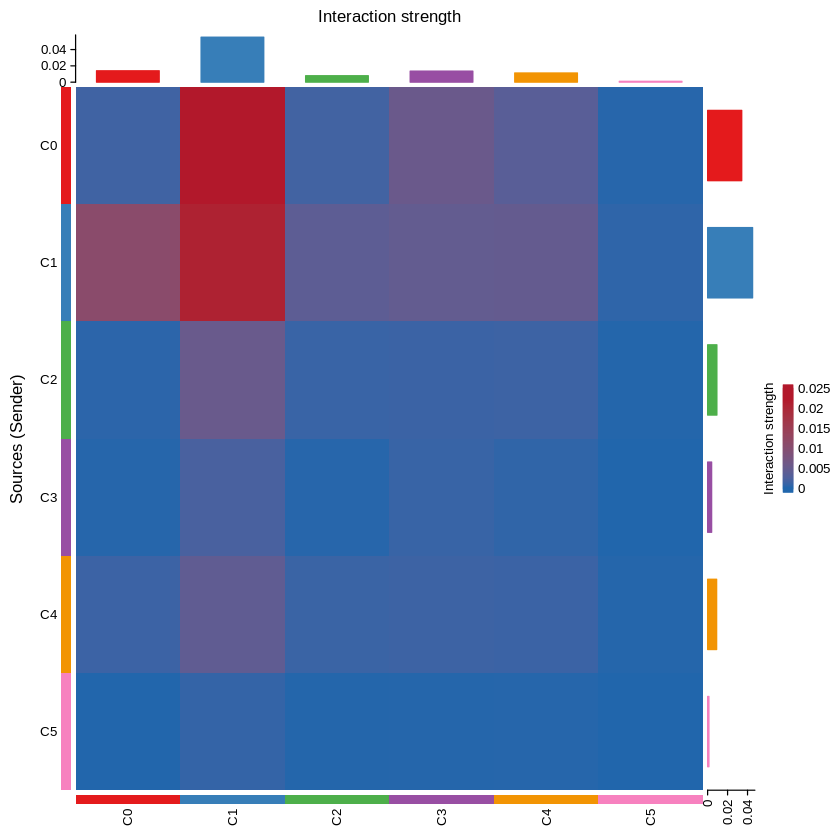

In [14]:
par(mfrow = c(1,1))
 netVisual_heatmap(cellchat)
 netVisual_heatmap(cellchat, measure = "weight")


In [17]:
levels(ilc@active.ident) 

[1] "0" "1" "2" "3" "4" "8"

Warning message:
“Detected creation of a 'multiprocess' future. Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


R_zmq_msg_send errno: 4 strerror: Interrupted system call


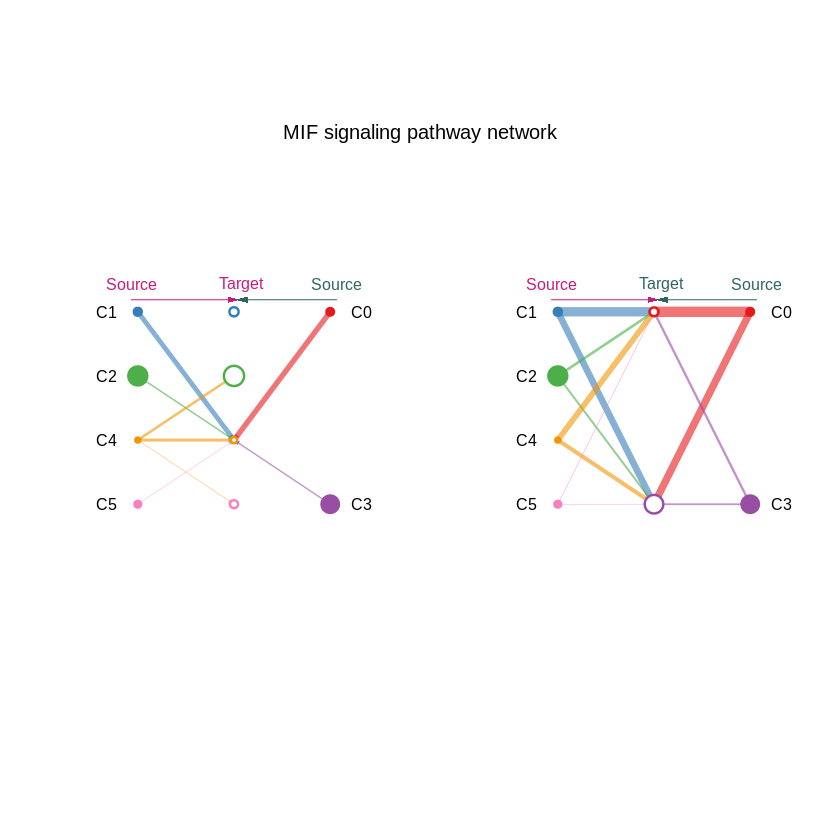

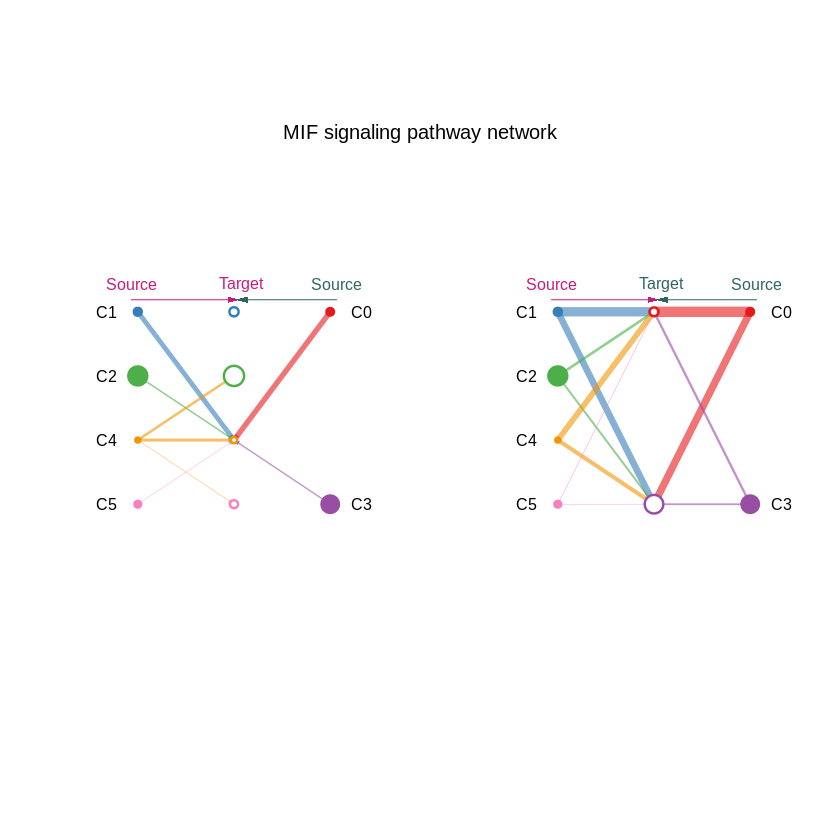

In [20]:
#plot_size(8,6)

#levels(nk@idents)    # show all celltype

vertex.receiver = c(2,3,5,6) 
#par(mar=c(5.1,4.1,4.1,2.1))
groupSize <- as.numeric(table(ilc$seurat_clusters)) 

netVisual_aggregate(cellchat, signaling = "MIF", vertex.receiver = vertex.receiver, layout = "hierarchy", vertex.weight = groupSize,
  vertex.label.cex=0.8, title.space=6)



# save as TIL/CXCL_hierarchy.pdf
#在上图中，实心圆代表源和目标，层次图的左边代表的是我们感兴趣的细胞，右边代表剩余的细胞，
#层次图可用来探索感兴趣的细胞和其他细胞之间的信号传导关系。
#点的大小代表细胞簇的细胞数量，线的粗细代表细胞之间的信号强弱。

#dev.copy2pdf(file = "/data_alluser/CXY/keti/singlecell_eqtl/result/PLOT/result_plot2_cellchat/MIF_层次图.pdf",width = 8, height = 6)


In [25]:
netAnalysis_signalingRole_network(cellchat, signaling = "CCL", font.size.title = 13, 
                                   width = 15, height = 6, font.size = 12)

ERROR: Error in matrix(unlist(centr0), ncol = length(centr0), byrow = FALSE): 'data' must be of a vector type, was 'NULL'
